<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/Tp2_Stat_ModelesFormelsBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tableau Jeux de donnees car(vitesse/distance):**

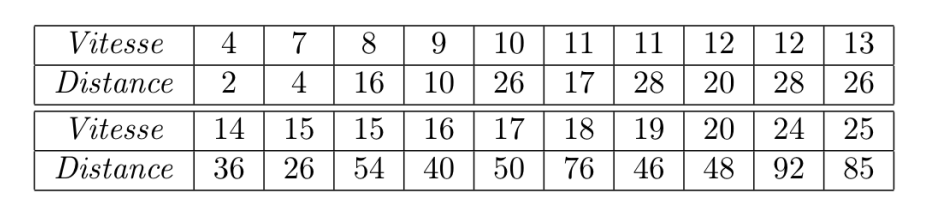

In [53]:
serie_vitesse<-c(4,7, 8, 9, 10, 11, 11 ,12, 12 ,13 ,14 ,15 ,15 ,16 ,17 ,18 ,19 ,20 ,24 ,25)
serie_distance<-c(2 ,4 ,16 ,10 ,26 ,17 ,28 ,20 ,28 ,26 ,36 ,26 ,54 ,40 ,50 ,76 ,46 ,48 ,92 ,85)

df <- data.frame(Vitesse = serie_vitesse, Distance = serie_distance)
print(df)



   Vitesse Distance
1        4        2
2        7        4
3        8       16
4        9       10
5       10       26
6       11       17
7       11       28
8       12       20
9       12       28
10      13       26
11      14       36
12      15       26
13      15       54
14      16       40
15      17       50
16      18       76
17      19       46
18      20       48
19      24       92
20      25       85


### 1. Calcule de la moyenne arithmetique

#### **Distance:**

In [54]:
mean_distance <- mean(df$Distance)

print(paste("La moyenne Distance :", mean_distance))

[1] "La moyenne Distance : 36.5"


#### **Vitesse:**

In [55]:
mean_vitesse <- mean(df$Vitesse)

print(paste("La moyenne Vitesse  :", mean_vitesse))

[1] "La moyenne Vitesse  : 14"


### 2.Variance

#### **Distance :**

In [56]:
variance_distance <- var(df$Distance)
print(paste("La variance Distance :", variance_distance))


[1] "La variance Distance : 642.789473684211"


#### **Vitesse :**

In [57]:
variance_vitesse <- var(df$Vitesse)
print(paste("La variance Vitesse :", variance_vitesse))


[1] "La variance Vitesse : 29.7894736842105"


##### **Covariance Distance vitesse**

In [58]:
covariance_vd <- cov(df$Vitesse, df$Distance)
print(paste("La covariance entre Vitesse et Distance est :", covariance_vd))

[1] "La covariance entre Vitesse et Distance est : 128"


### 3.Droite de regression

#### **Distance par rapport a vitesse** (d/v):

In [59]:
regression_dv <- lm(Distance ~ Vitesse, data = df)
print(summary(regression_dv))


Call:
lm(formula = Distance ~ Vitesse, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7968  -6.3048  -0.2032   5.6325  22.3127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -23.655      6.230  -3.797  0.00132 ** 
Vitesse        4.297      0.416  10.329 5.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.897 on 18 degrees of freedom
Multiple R-squared:  0.8556,	Adjusted R-squared:  0.8476 
F-statistic: 106.7 on 1 and 18 DF,  p-value: 5.416e-09



#### **Vitesse  par rapport a Distance** (v/d):

In [60]:
regression_vd <- lm(Vitesse ~ Distance, data = df)
print(summary(regression_vd))


Call:
lm(formula = Vitesse ~ Distance, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8657 -1.4578  0.1883  1.2900  3.7100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.73168    0.84980   7.921 2.82e-07 ***
Distance     0.19913    0.01928  10.329 5.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.131 on 18 degrees of freedom
Multiple R-squared:  0.8556,	Adjusted R-squared:  0.8476 
F-statistic: 106.7 on 1 and 18 DF,  p-value: 5.416e-09



### Representation graphique des 2 droites

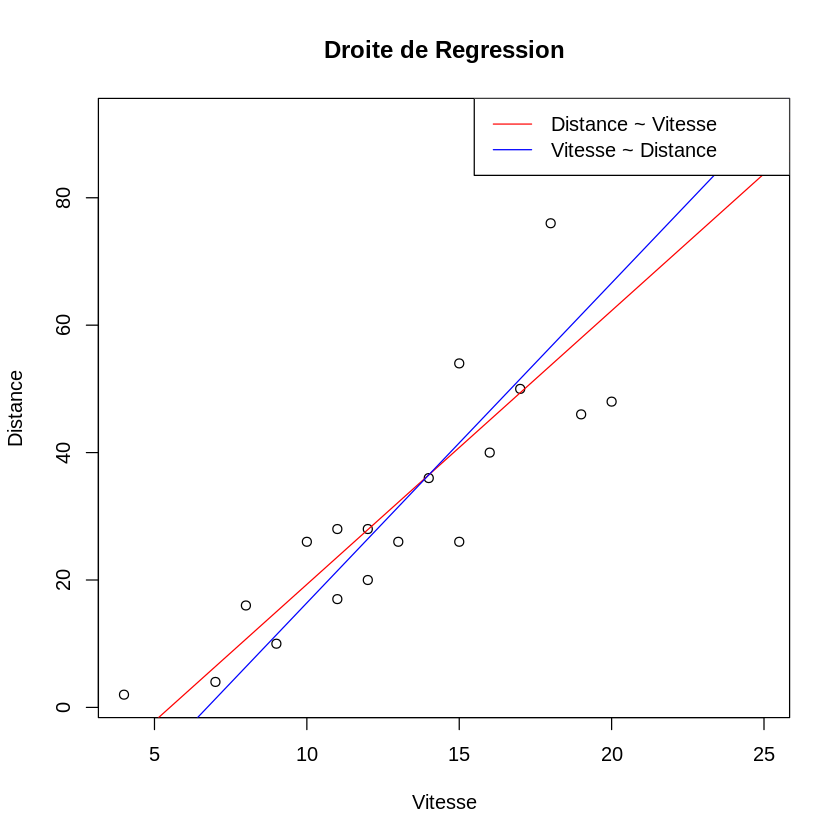

In [61]:
library(ggplot2)

plot(df$Vitesse, df$Distance,
     xlab = "Vitesse", ylab = "Distance",
     main = "Droite de Regression")

abline(regression_dv, col = "red")

intercept_vd <- coef(regression_vd)[1]
slope_vd <- coef(regression_vd)[2]

abline(a = -intercept_vd / slope_vd, b = 1 / slope_vd, col = "blue")

legend("topright", legend = c("Distance ~ Vitesse", "Vitesse ~ Distance"), col = c("red", "blue"), lty = 1)

In [62]:
slope_dv <- coef(regression_dv)[2]
slope_vd <- coef(regression_vd)[2]

m1 <- slope_dv
m2 <- 1/slope_vd

tan_theta <- abs((m1 - m2) / (1 + m1 * m2))

theta_radians <- atan(tan_theta)

theta_degrees <- theta_radians * (180 / pi)

print(paste("L' angle", theta_degrees, "degrees"))

[1] "L' angle 1.83914011376945 degrees"


### La coefficient de correlation

In [64]:
correlation_vd <- cor(df$Vitesse, df$Distance)

print(paste(" coefficient correlation :", correlation_vd))

[1] " coefficient correlation : 0.92500520486813"
